# 导入必要的库

In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By # 定位方式
from selenium.webdriver.support.ui import WebDriverWait # 等待操作
from selenium.webdriver.support import expected_conditions as EC # 期望条件

import random
import time
from pyquery import PyQuery as pq

# 打开浏览器，访问拉勾网并登录

In [6]:
# 打开浏览器
browser = webdriver.Edge()

In [7]:
# 访问拉勾网
browser.get("https://www.lagou.com/")

#手动登录

# 访问目标网页

In [8]:
url_template = "https://www.lagou.com/jobs/list_{keyword}/p-city_213?&cl=false&fromSearch=true&labelWords=&suginput="

keyword = "新媒体运营"

url = url_template.format(keyword=keyword)

url

'https://www.lagou.com/jobs/list_新媒体运营/p-city_213?&cl=false&fromSearch=true&labelWords=&suginput='

In [9]:
browser.get(url)


# 循环：保存当前网页的源代码，翻页（一直到第30页）

In [10]:
# 用来存储所有页面的 HTML
all_page_sources = []

# 最大翻页次数
max_pages = 30
current_page = 1

# 翻页循环
while current_page <= max_pages:
    try:
        # 获取当前页面的 HTML 源代码
        page_source = browser.page_source
        all_page_sources.append(page_source)
        print(f"已保存第 {current_page} 页的源代码")
        
        # 等待“下一页”按钮可点击
        next_button = WebDriverWait(browser, 10).until(
        EC.element_to_be_clickable((By.XPATH, '//span[@action="next" and contains(@class, "next")]')) #': 定位到属性action为"next"并且类名包含"next"的span元素
        )
        next_button.click()  # 调用click()方法来模拟点击事件
        
        wait_time = random.randint(15, 25) # 生成 15 到 25 秒的随机浮点数
        print(f"等待{wait_time}秒")
    
        time.sleep(wait_time)   # 暂停指定的秒数
        
        # 增加页码
        current_page += 1
    except Exception as e:
        print(f"翻页失败，错误信息: {e}")
        break


已保存第 1 页的源代码
等待20秒
已保存第 2 页的源代码
等待17秒
已保存第 3 页的源代码
等待18秒
已保存第 4 页的源代码
等待17秒
已保存第 5 页的源代码
等待16秒
已保存第 6 页的源代码
等待23秒
已保存第 7 页的源代码
等待22秒
已保存第 8 页的源代码
等待24秒
已保存第 9 页的源代码
等待24秒
已保存第 10 页的源代码
等待22秒
已保存第 11 页的源代码
等待23秒
已保存第 12 页的源代码
等待22秒
已保存第 13 页的源代码
等待19秒
已保存第 14 页的源代码
等待17秒
已保存第 15 页的源代码
等待23秒
已保存第 16 页的源代码
等待25秒
已保存第 17 页的源代码
等待24秒
已保存第 18 页的源代码
等待19秒
已保存第 19 页的源代码
等待22秒
已保存第 20 页的源代码
等待16秒
已保存第 21 页的源代码
等待24秒
已保存第 22 页的源代码
等待18秒
已保存第 23 页的源代码
等待24秒
已保存第 24 页的源代码
等待18秒
已保存第 25 页的源代码
等待18秒
已保存第 26 页的源代码
等待19秒
已保存第 27 页的源代码
等待19秒
已保存第 28 页的源代码
等待19秒
已保存第 29 页的源代码
等待24秒
已保存第 30 页的源代码
等待20秒


### 代码解释：

1. **`WebDriverWait(browser, 10)`**: 这个函数会让程序等待最多 10 秒，直到某个条件成立。在这个例子中，条件是按钮变得可点击。
   
2. **`EC.element_to_be_clickable((By.XPATH, '//span[@action="next" and contains(@class, "next")]'))`**: 这个期望条件会确保`xpath`选择的元素存在，并且是可点击的。`xpath`在这里是用来选定具有特定属性（`action="next"`）且类名包含`next`的`span`标签。

3. **`next_button.click()`**: 一旦元素变得可点击，程序会自动点击该元素，通常用于翻页、提交表单等操作。

### 额外说明：
- `WebDriverWait` 用于实现隐式等待，它会一直等待指定的时间，直到目标元素满足条件。
- `element_to_be_clickable` 用来判断元素是否可以被点击，它会检查元素是否可见且启用了点击事件。


------------------------------ 

------------------------------ 

# 测试：解析数据

In [122]:
# 第一页的源代码
page_source_1 = all_page_sources[0]
page_source_1 

'<html><head><script async="" src="https://activity.lagou.com/activityapi/icon/getIcon.json?callback=jQuery112109912937120671097_1734635710838&amp;companyIds=136273140%2C144499843%2C9249%2C138317885%2C144386314%2C136766869%2C144269242%2C143597271%2C144590145%2C143730243%2C144203149%2C138304475%2C144486796%2C143756448&amp;markLocation=PPQ&amp;positionIds=12145257%2C12145207%2C11157179%2C12144888%2C12003329%2C12104374%2C12114204%2C11920302%2C12144512%2C12144325%2C12133280%2C12050794%2C12077051%2C12094246%2C11907702&amp;_=1734635710846"></script><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/js?id=G-DDLTLJDLHH&amp;cx=c&amp;_slc=1"></script><script async="" src="https://www.lgstatic.com/yun-main/static/common/static/sensorsSDK/1.8.10/js/sensorsdata.min.js" charset="UTF-8"></script><script src="https://zz.bdstatic.com/linksubmit/push.js"></script><script async="" src="//www.google-analytics.com/analytics.js"></script><script src="//hm.baidu.com/hm.js?4233

In [123]:
doc = pq(page_source_1)

doc.text()

'招聘求职信息-招聘网站-人才网-拉勾招聘\nwindow.Apm_Domain_WebServerName = "lg-www-fed"; if (window.elasticApmInstance) { window.elasticApmInstance.setUserContext({ id: (window.CONST_VARS && window.CONST_VARS("user") && window.CONST_VARS("user").id) || "", username: (window.CONST_VARS && window.CONST_VARS("user") && window.CONST_VARS("user").name) || "", }); } (function() { var protocol = window.location.protocol; var host = window.location.host; var baseUrl = protocol + \'//\' + host; window.GLOBAL_DOMAIN = window.GLOBAL_DOMAIN || { ctx: \'https://www.lagou.com\', rctx: \'https://hr.lagou.com\', crctx: \'https://hr.lagou.com/company\', pctx: \'https://passport.lagou.com\', gctx: \'https://gate.lagou.com\', actx: \'https://account.lagou.com\', cpctx: \'https://xiaoyuan.lagou.com\', acctx: \'https://activity.lagou.com\', paictx: \'https://pai.lagou.com\', sctx: \'https://suggest.lagou.com\', zctx: \'https://yanzhi.lagou.com\', ectx: \'https://easy.lagou.com\', proctx: \'https://pro.lagou.com\', lgsctx: p

**岗位名称**

In [124]:
for job_title in doc("h3").items():
    job_title = job_title.text()
    print(job_title)

新媒体运营专员
新媒体运营
新媒体运营
新媒体运营
新媒体运营
新媒体运营专员
新媒体运营
新媒体运营
新媒体运营
新媒体运营
新媒体运营实习生
新媒体运营
新媒体运营
新媒体运营
新媒体运营


**岗位id**

url：
https://www.lagou.com/wn/jobs/{岗位id}.html

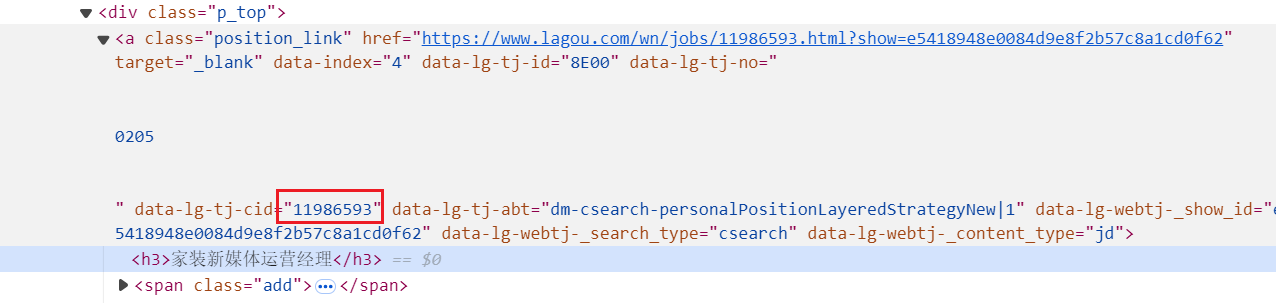

In [68]:
for job_id in doc("a.position_link").items():
    job_id = job_id.attr("data-lg-tj-cid")
    print(job_id)

12145207
12144888
11157179
12050794
11907702
12073976
12077875
11986593
11856821
10912831
12104092
11988588
12087034
11964199
12131525


**区域**

In [69]:
for location in doc('span.add em').items():
    location = location.text()
    print(location)

白云区
番禺区
元岗
番禺区
海珠区
白云区
荔湾区
黄埔区
白云区
元岗
黄埔区
天河区
天河区
天河区
番禺区


**发布时间**

In [70]:
for date in doc('span.format-time').items():
    date = date.text()
    print(date)

1天前发布
1天前发布
1天前发布
1天前发布
1天前发布
1天前发布
1天前发布
1天前发布
1天前发布
1天前发布
1天前发布
1天前发布
1天前发布
1天前发布
1天前发布


**薪资**

In [71]:
for salary in doc('span.money').items():
    salary = salary.text()
    print(salary)

8k-15k
12k-22k
6k-12k
8k-13k
13k-25k
9k-12k
15k-30k
15k-30k
15k-29k
7k-14k
9k-13k
8k-16k
10k-15k
6k-12k
8k-15k


**经验/学历要求**

In [114]:
for requirment in doc("div.p_bot div.li_b_l").items():
    requirment = requirment.text()
    
    text_1, education = requirment.strip('"').split('/', 1)
    experience = text_1.split(' ')[1].strip()  # 经验要求
    education = education.strip()  # 学历要求
    
    print(experience,education)

经验3-5年 本科
经验3-5年 本科
经验不限 大专
经验3-5年 本科
经验5-10年 本科
经验3-5年 大专
经验不限 大专
经验5-10年 大专
经验1-3年 本科
经验不限 大专
经验3-5年 本科
经验3-5年 大专
经验1-3年 大专
经验1-3年 大专
经验3-5年 大专


### 代码解释：

#### 1. `for requirment in doc("div.p_bot div.li_b_l").items():`
   - 这行代码使用`PyQuery`的`items()`方法遍历所有符合条件的元素。
   - `doc("div.p_bot div.li_b_l")`：选择器表达式选择所有符合`div.p_bot div.li_b_l`路径的`div`标签元素。
     - `div.p_bot div.li_b_l` 选中的是嵌套的 `div` 标签，首先是`class="p_bot"`的`div`，再是其中带有`class="li_b_l"`的`div`元素。
   - `.items()`是一个`PyQuery`的方法，它会返回这些元素的迭代器，可以依次获取每一个符合条件的元素。

#### 2. `requirment = requirment.text()`
   - `requirment.text()`方法提取出当前元素（一个`div`）的文本内容。
   - 这个文本内容将是当前`div`内的所有纯文本（例如：`经验不限/大专`）去除了HTML标签之后的内容。
   - 这行代码将提取出来的文本保存到`requirment`变量。

#### 3. `text_1, education = requirment.strip('"').split('/', 1)`
   - `requirment.strip('"')`：去掉字符串首尾的双引号字符。通常这些可能是格式问题，或者用于包裹字符串的标点。
   - `split('/', 1)`：将`requirment`按斜杠`/`分割成两个部分。`1`表示最多分割一次，这样可以确保分成`经验要求`和`学历要求`两个部分。
     - 如果原字符串是 `"经验不限/大专"`，那么 `split` 会返回一个包含两个元素的列表（`["经验不限", "大专"]`）。
     - `text_1` 会获取左边部分（即经验要求），`education` 会获取右边部分（即学历要求）。

#### 4. `experience = text_1.split(' ')[1].strip()  # 经验要求`
   - `text_1.split(' ')`：将`text_1`按空格拆分成多个部分。
     - 假设`text_1 = "经验不限"`，`split(' ')` 会返回一个包含单个元素的列表 `["经验不限"]`。
   - `[1]`：这里代码尝试访问拆分后的第二个元素（索引`1`），但是如果`split(' ')`返回的列表只有一个元素（即没有空格），这个操作会抛出`IndexError`。
   - `.strip()`：去掉字符串两端的空白字符（如空格、换行符等）。

#### 5. `education = education.strip()  # 学历要求`
   - `education.strip()`：去掉`education`字符串两端的空白字符，用于确保没有多余的空格。

#### 6. `print(experience, education)`
   - 这行代码打印提取出的经验要求和学历要求。
   - `experience` 是从 `text_1` 中提取的经验要求，`education` 是从`requirment`中分割出的学历要求。

### 总结：
- 这段代码从网页中提取出关于职位要求的文本（通常是经验要求和学历要求）。
- 它通过CSS选择器获取包含职位要求的`div`元素，然后解析出经验要求和学历要求并打印出来。
- 经验要求和学历要求的分割依据是字符`/`，并且使用`split(' ')`进一步拆分经验要求。

**公司名称**


In [132]:
for campany_name in doc("div.company_name").items():
    company_name = campany_name.text()
    print(campany_name.text())

广东粤缆电线电缆有限公司
零零鸽营销科技（广州）有限责任公司
雷科技 该企业已上传营业执照并通过资质验证审核
广东弘博隆物联网技术有限公司
龙丰自动化培训学校
粤规院科技集团
心和塾
广州市美琳达广告有限公司
广州正奇科技有限公司
广东法商教育发展有限公司
粤规院科技集团
爱客
广州腾龙健康实业股份有限公司
广东萝薇化妆品股份有限公司
中大信息


**公司基本信息**


In [137]:
for company_info in doc('div.industry').items():
    
    company_info = company_info('div.industry').text()
    # 因为有的公司没有这些信息，所以要用一个if else 语句做逻辑判断
    if ' / ' in company_info:
        industry, financing, size = company_info.split(' / ') #所在行业/融资情况/公司规模
    else:
        # 如果没有 ' / '，可以做默认值处理
        industry = ""
        financing = ""
        size = ""
    
    print(industry, financing, size)

  
新零售 不需要融资 50-150人
内容资讯 天使轮 15-50人
消费生活,生活服务 不需要融资 15-50人
  
房地产｜建筑｜物业 不需要融资 500-2000人
教育｜培训 不需要融资 50-150人
  
制造业 不需要融资 150-500人
教育｜培训 不需要融资 500-2000人
房地产｜建筑｜物业 不需要融资 500-2000人
制造业 不需要融资 500-2000人
  
新零售 不需要融资 500-2000人
专业服务｜咨询,营销服务｜咨询 不需要融资 500-2000人


**公司福利待遇**

In [136]:
for benefit in doc('div.li_b_r').items():
    print(benefit.text().strip('“”'))

包住,可调休,年度体检
周末双休,五险
深入新媒体行业，个人成长和物质回报。
五险一金,绩效奖金,下午茶
绩效奖金,定期体检,股票期权
五险一金,绩效奖金,定期体检
员工福利,方案,购买五险
五险一金,绩效奖金,定期体检
免费班车,社保,绩效奖金
五险一金
五险一金,绩效奖金,定期体检
社保,专业培训
绩效奖金,员工旅游,餐饮补贴
定期体检,包吃住,专业培训
五险一金,定期体检,专业培训


------------------------------ 

------------------------------ 

# <strong style="color:red;">数据解析过程封装成一个函数</strong>

In [12]:
def extract_job_info(page_source):

    job_info_list = []

    doc = pq(page_source)
    
    for element in doc.items('ul.item_con_list li'):
        
        job_title = element('h3').text() #岗位名称
        job_id = element('a.position_link').attr('data-lg-tj-cid') #岗位id
        location = element('span.add em').text() #公司地址
        date = element('span.format-time').text() #发布时间
        salary = element('span.money').text() #薪资
        
        
        #岗位要求
        requirment = element('div.p_bot div.li_b_l').text()
        text_1, education = requirment.strip('"').split('/', 1)
        experience = text_1.split(' ')[1].strip()  # 经验要求
        education = education.strip()  # 学历要求
        
        company_name = element('div.company_name').text() #公司名称
        
        
        #公司信息
        company_info = element('div.industry').text() 
        
        # 因为有的公司没有这些信息，所以要用一个if else 语句做逻辑判断
        if ' / ' in company_info:
            industry, financing, size = company_info.split(' / ') #所在行业/融资情况/公司规模
        else:
            # 如果没有 ' / '，可以做默认值处理
            industry = ""
            financing = ""
            size = ""
        
        
        benefits = element('div.li_b_r').text().strip('“”') #公司福利
        
        job_info = {
            'job_title': job_title,        
            'job_id': job_id,
            'location': location,
            'date': date,
            'salary': salary,
            'experience': experience,
            'education': education,
            'company_name': company_name,
            'industry': industry,
            'financing': financing,
            'size': size,        
            'benefits': benefits            
        }
    
        job_info_list.append(job_info)
    
    return job_info_list
    

**用第一页的源代码来测试以上函数是否能正常运行**

In [13]:
job_info_list = extract_job_info(all_page_sources[0])
job_info_list

[{'job_title': '新媒体运营',
  'job_id': '12115926',
  'location': '增城区',
  'date': '1天前发布',
  'salary': '8k-15k',
  'experience': '经验3-5年',
  'education': '大专',
  'company_name': '荣进集团',
  'industry': '制造业',
  'financing': '不需要融资',
  'size': '150-500人',
  'benefits': '五险一金,全勤奖,绩效奖金'},
 {'job_title': '新媒体运营',
  'job_id': '12137524',
  'location': '白云区',
  'date': '1天前发布',
  'salary': '8k-15k',
  'experience': '经验3-5年',
  'education': '大专',
  'company_name': '中南机电',
  'industry': '消费生活',
  'financing': '不需要融资',
  'size': '50-150人',
  'benefits': '五险一金,全勤奖,绩效奖金'},
 {'job_title': '新媒体运营（双休/大厂/赛道福利好）',
  'job_id': '12137853',
  'location': '天河区',
  'date': '1天前发布',
  'salary': '8k-12k',
  'experience': '经验1-3年',
  'education': '本科',
  'company_name': '广州市新东方无忧乐知咨询服务有限公司',
  'industry': '教育｜培训',
  'financing': '不需要融资',
  'size': '少于15人',
  'benefits': '福利好,双休'},
 {'job_title': '新媒体运营',
  'job_id': '11980246',
  'location': '天河区',
  'date': '1天前发布',
  'salary': '7k-12k',
  'experience': '经验3-5年',

# 将所有页面源代码的数据提取出来保存到一个列表中

In [14]:
my_list = []

for page_source in all_page_sources:
    job_info_list = extract_job_info(page_source)
    my_list.extend(job_info_list)

my_list

[{'job_title': '新媒体运营',
  'job_id': '12115926',
  'location': '增城区',
  'date': '1天前发布',
  'salary': '8k-15k',
  'experience': '经验3-5年',
  'education': '大专',
  'company_name': '荣进集团',
  'industry': '制造业',
  'financing': '不需要融资',
  'size': '150-500人',
  'benefits': '五险一金,全勤奖,绩效奖金'},
 {'job_title': '新媒体运营',
  'job_id': '12137524',
  'location': '白云区',
  'date': '1天前发布',
  'salary': '8k-15k',
  'experience': '经验3-5年',
  'education': '大专',
  'company_name': '中南机电',
  'industry': '消费生活',
  'financing': '不需要融资',
  'size': '50-150人',
  'benefits': '五险一金,全勤奖,绩效奖金'},
 {'job_title': '新媒体运营（双休/大厂/赛道福利好）',
  'job_id': '12137853',
  'location': '天河区',
  'date': '1天前发布',
  'salary': '8k-12k',
  'experience': '经验1-3年',
  'education': '本科',
  'company_name': '广州市新东方无忧乐知咨询服务有限公司',
  'industry': '教育｜培训',
  'financing': '不需要融资',
  'size': '少于15人',
  'benefits': '福利好,双休'},
 {'job_title': '新媒体运营',
  'job_id': '11980246',
  'location': '天河区',
  'date': '1天前发布',
  'salary': '7k-12k',
  'experience': '经验3-5年',

In [15]:
len(my_list) # 输出列表长度（即工作岗位的数量）

450

# 导出数据到Excel

In [ ]:
import pandas as pd

# 将列表转换为 pandas DataFrame
df = pd.DataFrame(my_list)

# 将 DataFrame 写入 excel 文件
df.to_excel('job_list.xlsx', index=False)

: 